# Assignment 1

I have chosen this dataset:
https://www.kaggle.com/deepmatrix/imdb-5000-movie-dataset
It has 3756 objects and 9 attributes, which were parsed from film rating website http://www.imdb.com/ . Some of the features could be unused, however most of them should be interesting to research.

List of quantitative features:

$\cdot$ Film duration

$\cdot$ gross

$\cdot$ budget

$\cdot$ rating in imdb

$\cdot$ likes on the facebook page

List of nominal features:

$\cdot$ colour of the film (black/white or coloured)

$\cdot$ Age rating (for example PG-13)

$\cdot$ country where film was shot

$\cdot$ language of the film

The main point of the research is opportunity to predict gross or rating of the film by, for example, budget or country.

Below you can see a code of csv-file import.

In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
%pylab inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
pylab.rcParams['figure.figsize'] = (20, 7)

Populating the interactive namespace from numpy and matplotlib


In [4]:
movies = pd.read_csv('movies1.csv', index_col=0, delimiter=";")
movies.head()

,duration,gross,budget,imdb_score,movie_facebook_likes,color,content_rating,country,language
0,178.0,760505847.0,237000000,7.9,33000,Color,PG-13,USA,English
1,169.0,309404152.0,300000000,7.1,0,Color,PG-13,USA,English
2,148.0,200074175.0,245000000,6.8,85000,Color,PG-13,UK,English
3,164.0,448130642.0,250000000,8.5,164000,Color,PG-13,USA,English
5,132.0,73058679.0,263700000,6.6,24000,Color,PG-13,USA,English


# Assignment 2

I decided to take 3 features in my data: gross, budget and imdb_score to visualise this set of data and apply for it a k-means method for building clusters.

NB: it could be profitable to take more features for clustering and represent them with a help of PCA like in the last task

In [5]:
df = movies[["gross", "budget", "imdb_score"]]
df.head()

,gross,budget,imdb_score
0,760505847.0,237000000,7.9
1,309404152.0,300000000,7.1
2,200074175.0,245000000,6.8
3,448130642.0,250000000,8.5
5,73058679.0,263700000,6.6


##### Create useful functions

This one returns cluster division

In [6]:
def calc_kmeans(df, nclust):
    X = df.as_matrix()
    kmeans = KMeans(n_clusters=nclust, random_state=42).fit(X)
    y_kmeans = kmeans.predict(X)
    centers = kmeans.cluster_centers_    
    return X, kmeans, y_kmeans

This one draws three beautiful graphs for each pair of attributes

In [7]:
def draw_kmeans(X, y_kmeans, nclust, centers, s1):
    f, (ax1, ax2, ax3) = plt.subplots(1, 3)   
    ax1.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='Paired', label='line 1',)
    ax1.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
    ax1.set_xlabel(df.columns[0])
    ax1.set_ylabel(df.columns[1])
    ax2.scatter(X[:, 0], X[:, 2], c=y_kmeans, s=50, cmap='Paired')
    ax2.scatter(centers[:, 0], centers[:, 2], c='black', s=200, alpha=0.5)
    ax2.set_xlabel(df.columns[0])
    ax2.set_ylabel(df.columns[2]);
    ax3.scatter(X[:, 1], X[:, 2], c=y_kmeans, s=50, cmap='Paired')
    ax3.scatter(centers[:, 1], centers[:, 2], c='black', s=200, alpha=0.5)
    ax3.set_xlabel(df.columns[1])
    ax3.set_ylabel(df.columns[2]);
    ax1.set_title('number of clusters: '+str(nclust)+s1)
    return

This one combines previous two functions

In [8]:
def mykmeans(df, nclust1, s1):
    X, kmeans, y_kmeans = calc_kmeans(df, nclust1)
    draw_kmeans(X, y_kmeans, nclust1, kmeans.cluster_centers_, s1)
    return X, kmeans, y_kmeans

#### Let's make some graphs

Without scaling, 3 clusters:

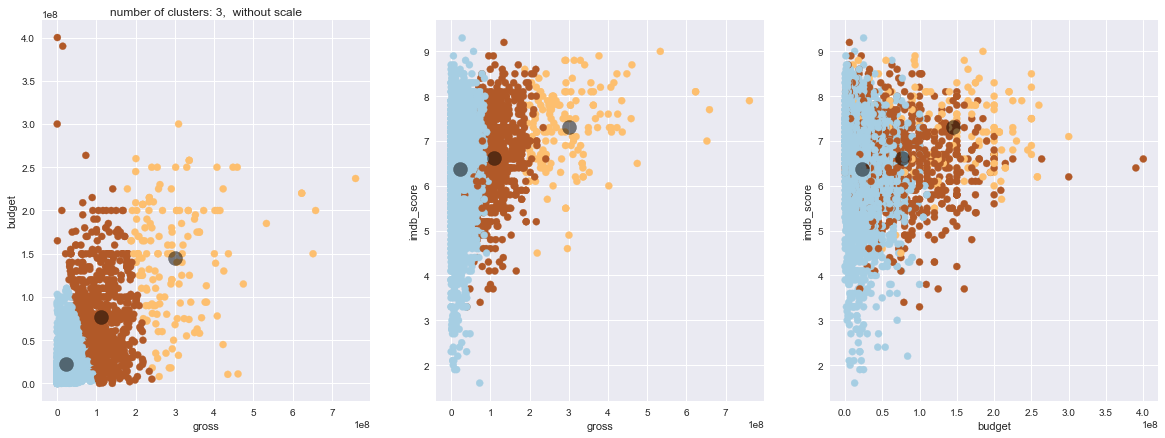

In [9]:
z1 = mykmeans(df, 3, ',  without scale')

Without scaling, 5 clusters:

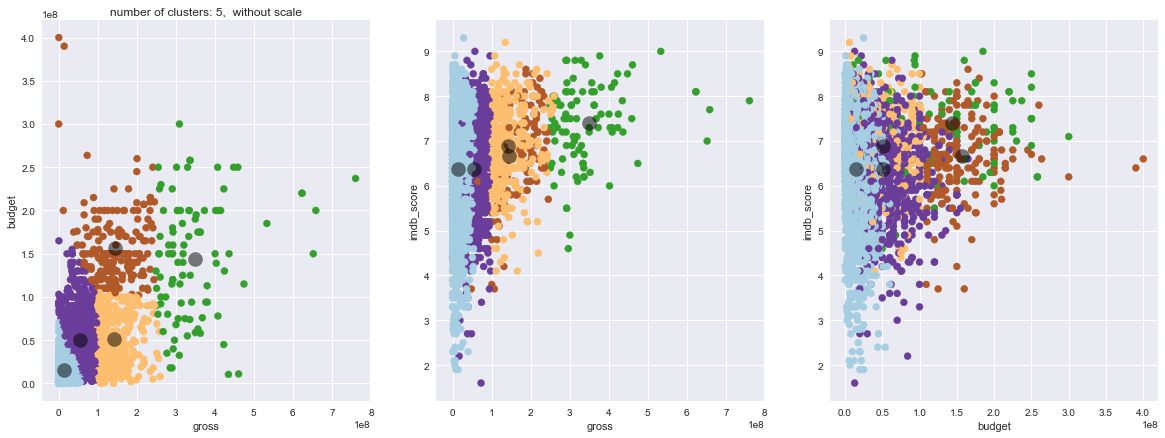

In [10]:
z2 = mykmeans(df, 5, ',  without scale')

Without scaling, 10 clusters:

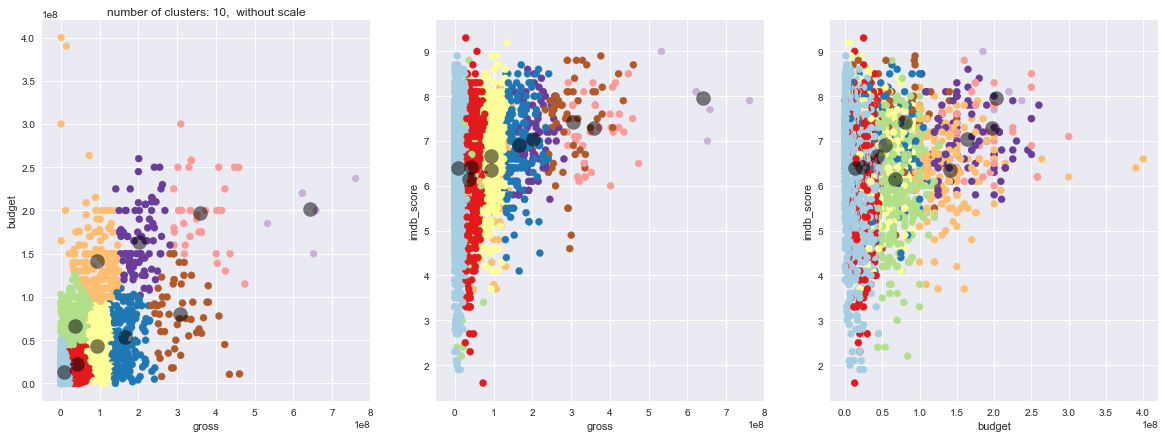

In [11]:
z3 = mykmeans(df, 10, ',  without scale')

Easy to see, that without scaling gross attribute plays enormous role in clusterization and it is not good. So it is useful to make scaling

A little bit of code for scaling:

In [12]:
meanv, stdv, maxv, minv = df.mean(), df.std(), df.max(), df.min()
dfss = df.subtract(meanv).multiply(1/stdv)
dfmms = df.subtract(minv).multiply(1/(maxv-minv))

StandardScaler, 3 clusters:

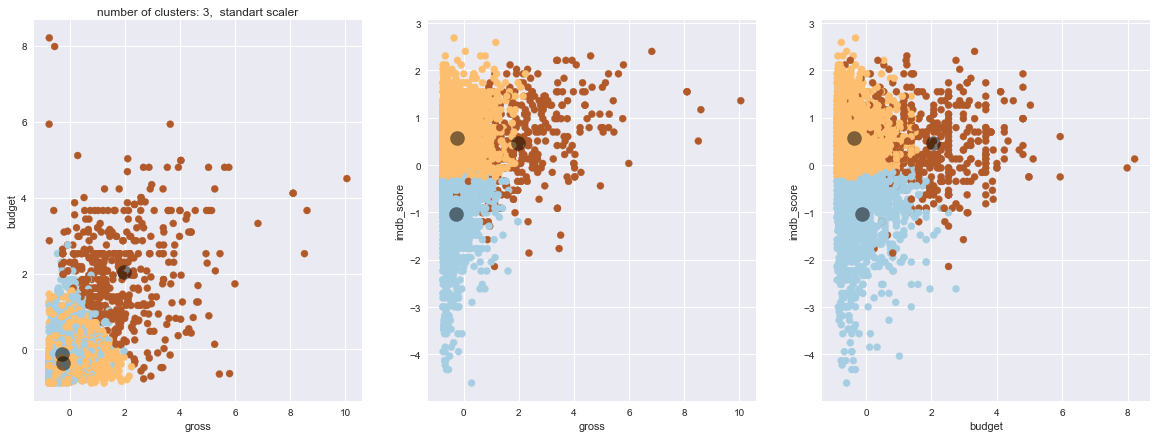

In [13]:
z4 = mykmeans(dfss, 3, ",  standart scaler")

StandardScaler, 5 clusters:

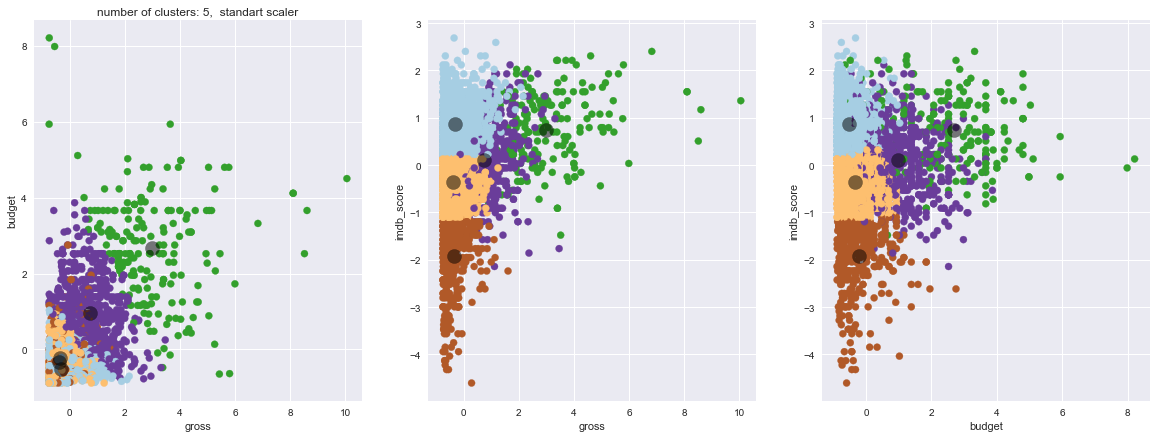

In [14]:
z5 = mykmeans(dfss, 5, ",  standart scaler")

StandardScaler, 10 clusters:

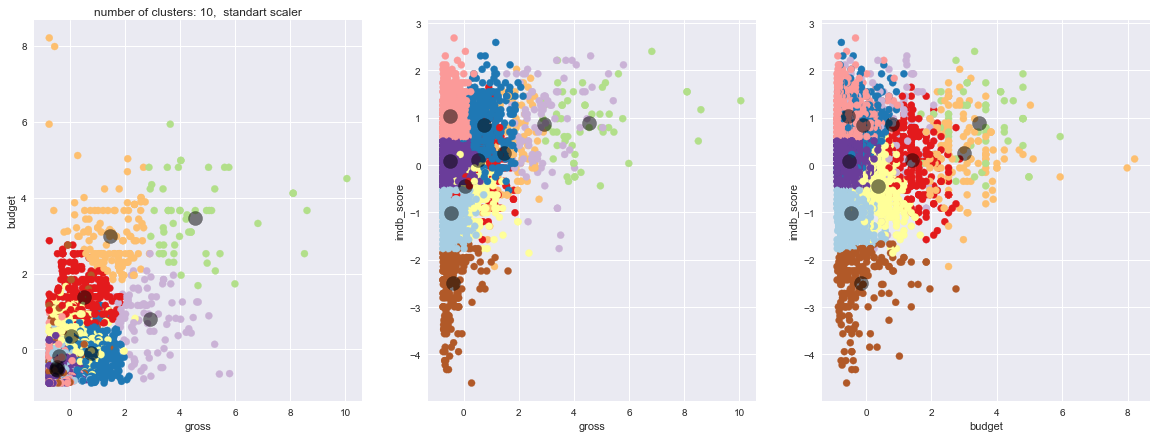

In [15]:
z6 = mykmeans(dfss, 10, ",  standart scaler")

MinMaxScaler, 3 clusters:

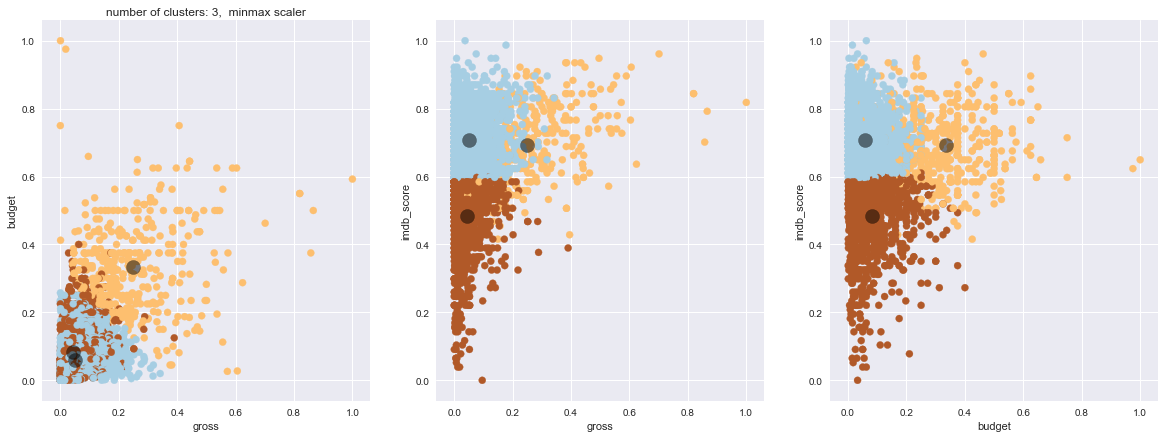

In [16]:
z7 = mykmeans(dfmms, 3,",  minmax scaler")

MinMaxScaler, 5 clusters:

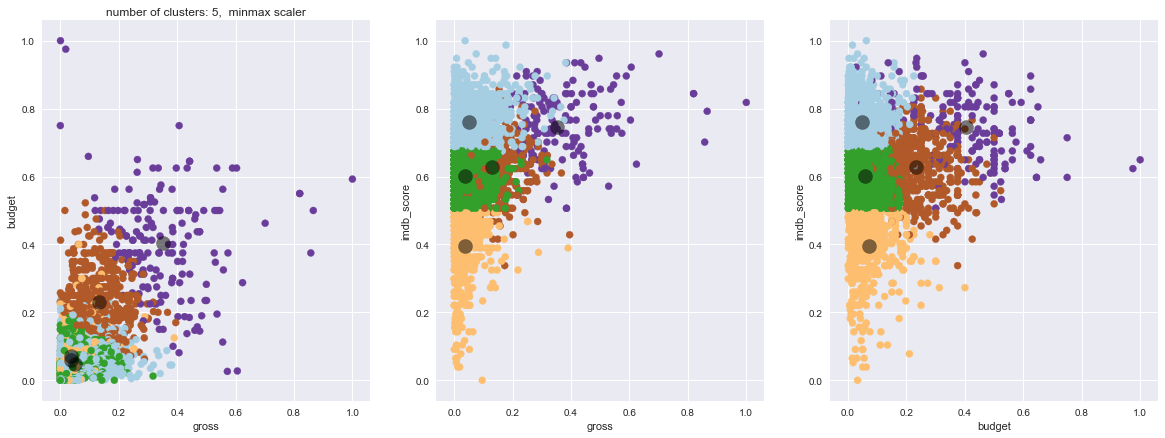

In [17]:
z8 = mykmeans(dfmms, 5, ",  minmax scaler")

MinMaxScaler, 10 clusters:

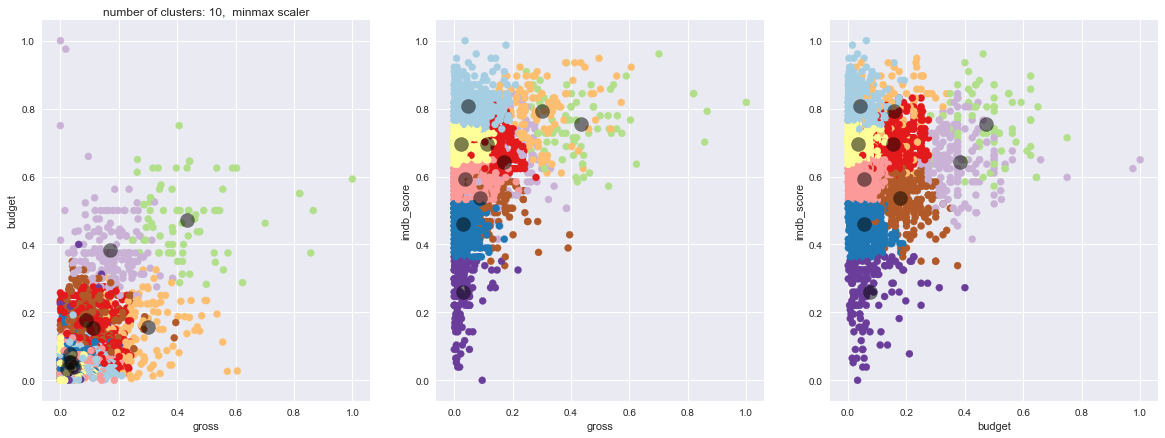

In [18]:
z9 = mykmeans(dfmms, 10, ",  minmax scaler")

To my mind fifth clusterization is the best (with StandardScaler and 5 clusters). It is seen that exist 2 clusters with high gross and budget and other clusters differ by imdb_score.

# Assignment 3

In previous assignment we find the best clusterization (with StandardScaler and 5 clusters). Let's add number of cluster as a feature in our dataset

In [23]:
X, kmeans, y_means = z5
movies["cluster"] = y_means
dfmms["cluster"] = y_means

It is easy to see, that one of the clusters has the best gross results. Let's research this attribute for this cluster

In [24]:
dfmms[dfmms["gross"] == max(dfmms["gross"])]

,gross,budget,imdb_score,cluster
0,1.0,0.5925,0.818182,1


It is cluster number 1. Well, it is time to filter our films and take only films from first cluster:

In [25]:
df1 = df[dfmms["cluster"] == 1]
df1.head()

,gross,budget,imdb_score
0,760505847.0,237000000,7.9
1,309404152.0,300000000,7.1
2,200074175.0,245000000,6.8
3,448130642.0,250000000,8.5
5,73058679.0,263700000,6.6


We has chosen cluster with the largest gross, so we will investigate gross attribute:

In [26]:
f = df1["gross"]
values = f.values
n_iterations = 5000
n_size = int(len(values)/2)
means = list()
for i in range(n_iterations):
    means.append(mean(np.random.choice(values, n_size)))

**Pivotal bootstrap**

Pivotal bootstrap: Take 5000 samples from N elements. Then we find mean of mean (*mean_means*) and standard deviation from mean (*std_means*). Tale a quantile of Gaussian distribution on 95% level of confidence. Variable *pivotal_res* contain confidence borders.

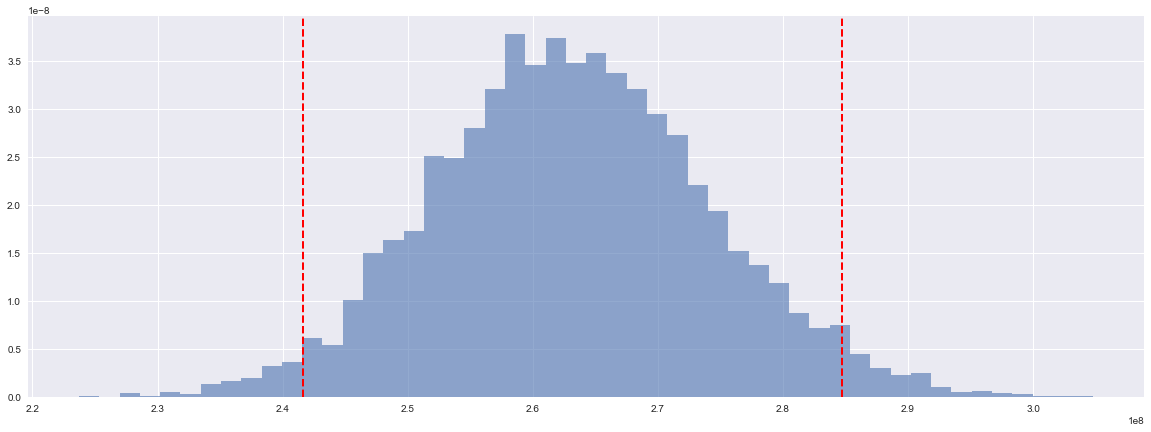

In [27]:
mean_means = mean(means)
std_means = std(means)
left_border = mean_means-1.96*std_means
right_border = mean_means+1.96*std_means
pivotal_res = left_border, right_border
n, bins, patches = plt.hist(means, 50, normed=1, alpha=0.6)
plt.axvline(left_border, color='r', linestyle='dashed', linewidth=2)
plt.axvline(right_border, color='r', linestyle='dashed', linewidth=2)

**Nonpivotal bootstrap**

Non-pivotal bootstrap: Take again 5000 samples from N elements. Let suppose 95% level of confidence. It means that we do not trust 5%. In sorted array of data we cut 2,5% from left side and 2,5% from right side. Variable *nonpivotal_res* contain confidence borders.

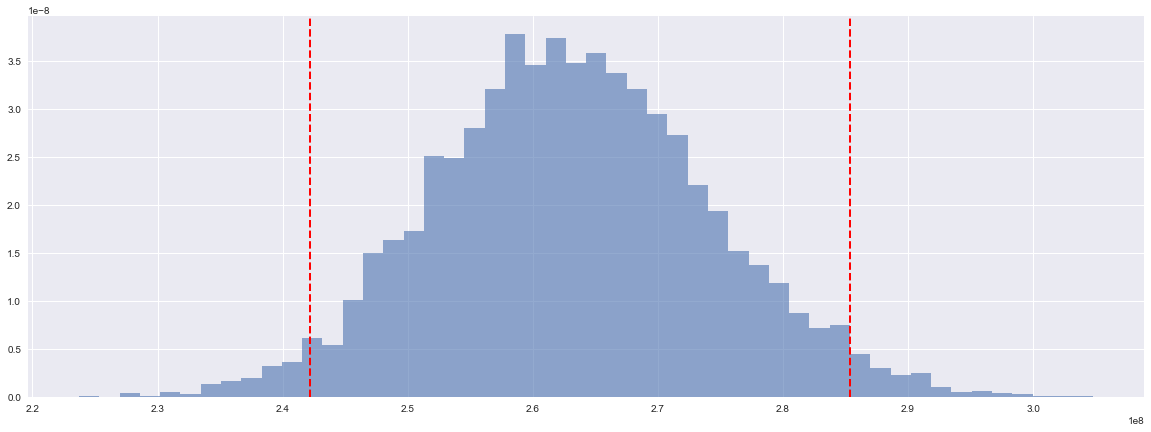

In [29]:
means_sorted = sort(means)
left_value = int(n_iterations * 0.025)
right_value = int(n_iterations * 0.975)
left_border = means_sorted[left_value]
right_border = means_sorted[right_value]
nonpivotal_res = left_border, right_border
n, bins, patches = plt.hist(means_sorted, 50, normed=1, alpha=0.6)
plt.axvline(left_border, color='r', linestyle='dashed', linewidth=2)
plt.axvline(right_border, color='r', linestyle='dashed', linewidth=2)

Now we can compare results of pivotal and nonpivotal approaches

In [31]:
print(pivotal_res)
print(nonpivotal_res)

(241661501.06630969, 284701698.89751893)
(242220403.5, 285323020.26530612)


Well, they don't differ so much. We noticed that pivotal and nonpivotal intervals almost the same in gross division.

Now we will compare means of current cluster with grand means. Suggest that gross of cluster 1 has a Gaussian distribution with mean *cluster_mean* and std *cluster_std*; Also gross for the whole dataset has a Gaussian distribution with mean *grand_mean* and std *grand_std*. It means that *cluster_gross* - *grand_gross* is also normally distributed with *common_mean* = *cluster_mean* - *grand_mean* and *common_std* = *cluster_std* + *grand_std*

We compute the confidence interval for the statement, that the mean of gross for cluster is greater than the gross for the whole dataset. It is left-tail testing with 95% confidence level. Also to prove it we will use non-pivotal bootstrap. 

In [32]:
cluster_means = means.copy()
cluster = df1["gross"]
cluster_mean = mean(df1["gross"])
cluster_len = df1.shape[0]
cluster_std = std(df1["gross"])

In [33]:
grand = df["gross"]
grand_mean = mean(df["gross"])
grand_len = df.shape[0]
grand_std = std(df1["gross"])

In [34]:
values = grand.values
n_iterations = 5000
n_size = int(len(values)/2)
grand_means = list()
for i in range(n_iterations):
    grand_means.append(mean(np.random.choice(values, n_size)))
# n, bins, patches = plt.hist(grand_means, 50, normed=1, alpha=0.6)

We generated 5000 trials.5000⋅0,05=250. Therefore, the left bound of the 95% confidence interval coincides with the 251-st element of sorted sequences of difference of cluster and grand means obtained with the help of bootstrap.

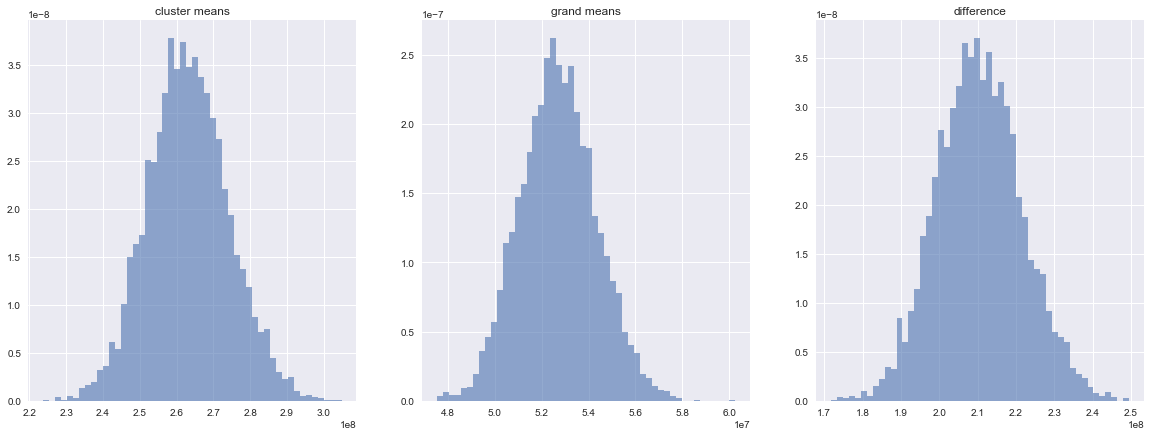

In [35]:
diff_means = np.subtract(cluster_means, grand_means)
conf_int = diff_means[251]; 
conf_int2 = cluster_mean - grand_mean - 1.65*sqrt(cluster_std/cluster_len+grand_std/grand_std)
# n, bins, patches = plt.hist(diff_means, 50, normed=1, alpha=0.6)
f, (ax1, ax2, ax3) = plt.subplots(1, 3)   
n, bins, patches = ax1.hist(cluster_means, 50, normed=1, alpha=0.6)
n, bins, patches = ax2.hist(grand_means, 50, normed=1, alpha=0.6)
n, bins, patches = ax3.hist(diff_means, 50, normed=1, alpha=0.6)
ax1.set_title('cluster means')
ax2.set_title('grand means')
ax3.set_title('difference')

In [36]:
print(conf_int, conf_int2)

213431488.858 210758051.19


First value present left border calculated by bootstrap; second one is calculated by testing

Obviously, values of gross from cluster is much larger, than average

# Assignment 4

In [41]:
movies.head()

,duration,gross,budget,imdb_score,fb_likes,color,content_rating,country,language,cluster
0,178.0,760505847.0,237000000,7.9,33000,Color,PG-13,USA,English,1
1,169.0,309404152.0,300000000,7.1,0,Color,PG-13,USA,English,1
2,148.0,200074175.0,245000000,6.8,85000,Color,PG-13,UK,English,1
3,164.0,448130642.0,250000000,8.5,164000,Color,PG-13,USA,English,1
5,132.0,73058679.0,263700000,6.6,24000,Color,PG-13,USA,English,1


As a nominal feature I have chosen country. Let's see what countries we have in our dataset:

In [42]:
movies["country"].value_counts()

USA              2987
UK                318
France            101
Germany            80
Canada             59
Australia          39
Spain              20
HongKong           13
China              12
NewZealand         11
Italy              11
Japan              11
Denmark             8
Ireland             7
SouthKorea          6
Mexico              6
Brazil              5
Iran                4
India               4
Norway              4
Thailand            4
SouthAfrica         3
Argentina           3
CzechRepublic       3
Russia              3
Netherlands         3
Taiwan              2
Romania             2
Israel              1
NewLine             1
WestGermany         1
Finland             1
Poland              1
Hungary             1
Colombia            1
Afghanistan         1
Belgium             1
Peru                1
Officialsite        1
Iceland             1
Aruba               1
Georgia             1
Indonesia           1
Greece              1
Chile               1
Name: coun

There is a lot of 1 values. It means that it is profitable to change attribute. I decided to make division by continents:

In [43]:
NA = ["USA", "Canada", "Mexico"]
SA = ["Peru", "Aruba", "Chile", "Brazil", "Argentina", "Colombia"]
Europe = ["UK", "Germany", "France", "Spain", "Czech Republic", "Denmark", "Ireland", "Italy", "Romania",
         "Netherlands", "Hungary", "Russia", "Belgium", "Greece", "West Germany", "Finland", "Norway", 
          "Iceland", "Poland"]
Asia = ["China", "Japan", "Hong Kong", "South Korea", "Taiwan", "Thailand", "Iran", "Georgia", 
        "India", "Israel", "Indonesia", "Afghanistan"]
Others = ["New Line", "Official site", "South Africa", "Australia", "New Zealand", "NA"]

In [45]:
cont = []
for i in movies.index:
    if movies.loc[i,"country"] in NA: 
        cont.append("NorthA")
    elif movies.loc[i,"country"] in SA: 
        cont.append("SouthA")
    elif movies.loc[i,"country"] in Europe: 
        cont.append("Europe")
    elif movies.loc[i,"country"] in Asia: 
        cont.append("Asia")
    elif movies.loc[i,"country"] in Others: 
        cont.append("Others")
    else:
        cont.append("Others")
movies["continent"] = cont
movies.head(10)

,duration,gross,budget,imdb_score,fb_likes,color,content_rating,country,language,cluster,continent
0,178.0,760505847.0,237000000,7.9,33000,Color,PG-13,USA,English,1,NorthA
1,169.0,309404152.0,300000000,7.1,0,Color,PG-13,USA,English,1,NorthA
2,148.0,200074175.0,245000000,6.8,85000,Color,PG-13,UK,English,1,Europe
3,164.0,448130642.0,250000000,8.5,164000,Color,PG-13,USA,English,1,NorthA
5,132.0,73058679.0,263700000,6.6,24000,Color,PG-13,USA,English,1,NorthA
6,156.0,336530303.0,258000000,6.2,0,Color,PG-13,USA,English,1,NorthA
7,100.0,200807262.0,260000000,7.8,29000,Color,PG,USA,English,1,NorthA
8,141.0,458991599.0,250000000,7.5,118000,Color,PG-13,USA,English,1,NorthA
9,153.0,301956980.0,250000000,7.5,10000,Color,PG,UK,English,1,Europe
10,183.0,330249062.0,250000000,6.9,197000,Color,PG-13,USA,English,1,NorthA


Now this attribute is created. Let's get started

Contigency table:

In [46]:
ct = pd.crosstab(movies.continent, movies.cluster, margins=True)
ct = ct.loc[["NorthA", "Europe", "Asia", "SouthA", "Others", "All"], :]
ct

cluster,0,1,2,3,4,All
continent,,,,,,
NorthA,856,169,1095,569,363,3052
Europe,296,16,170,44,37,563
Asia,22,4,9,4,2,41
SouthA,9,0,2,0,1,12
Others,32,7,26,6,7,78
All,1215,196,1302,623,410,3746


Relative contigency table:

In [47]:
ct_norm = ct.div(ct["All"], axis=0)
ct_norm = ct_norm.drop("All", axis=1)
p_all = ct_norm.loc["All", :]
# ct_norm = ct_norm.drop("All", axis=0)

ct_norm

cluster,0,1,2,3,4
continent,,,,,
NorthA,0.280472,0.055374,0.358781,0.186435,0.118938
Europe,0.525755,0.028419,0.301954,0.078153,0.065719
Asia,0.536585,0.097561,0.219512,0.097561,0.048780
SouthA,0.750000,0.000000,0.166667,0.000000,0.083333
Others,0.410256,0.089744,0.333333,0.076923,0.089744
All,0.324346,0.052322,0.347571,0.166311,0.109450


Quetelet table:

In [48]:
quetle = pd.DataFrame(index=ct_norm.index, columns=[0, 1, 2, 3, 4])
for i in quetle.index:
    for j in quetle.columns:
        quetle.loc[i,j] = (ct_norm.loc[i, j]-p_all[j])/p_all[j]
quetle

,0,1,2,3,4
continent,,,,,
NorthA,-0.13527,0.0583124,0.0322535,0.121005,0.0866909
Europe,0.620969,-0.456846,-0.131245,-0.53008,-0.399549
Asia,0.654361,0.864609,-0.368439,-0.413381,-0.554313
SouthA,1.31235,-1,-0.520481,-1,-0.238618
Others,0.264873,0.715201,-0.0409626,-0.537474,-0.18005
All,0,0,0,0,0


It is hard to find something interesting only with this table, however with clusters description and graph it is possible to find something interesting:

,0,1,2,3,4
imdb_score,0.750265,0.732640,0.581822,0.645432,0.368768
gross,0.039717,0.346489,0.034004,0.136134,0.035522
budget,0.041810,0.392595,0.061823,0.204412,0.072757


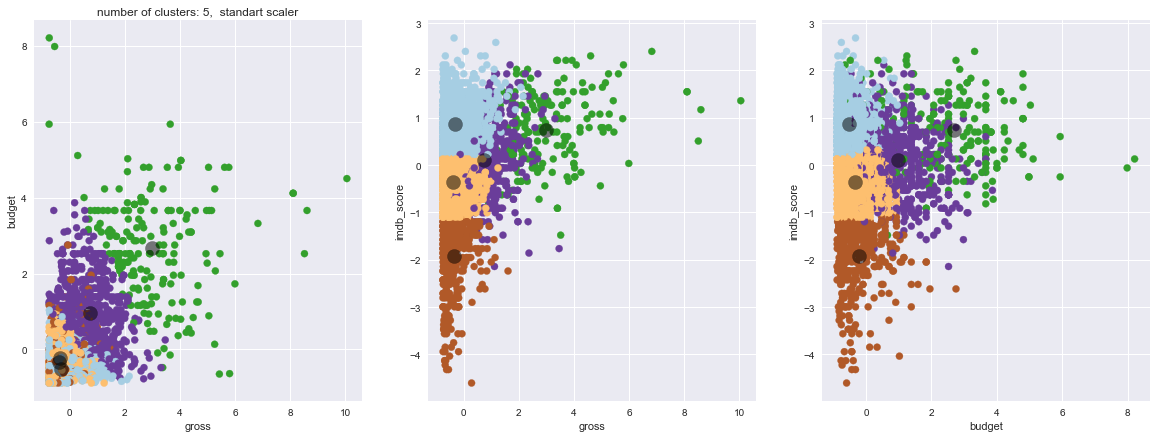

In [49]:
z5 = mykmeans(dfss, 5, ",  standart scaler")
cluster_char_df = pd.DataFrame([dfmms.groupby(["cluster"])["imdb_score"].mean(), dfmms.groupby(["cluster"])["gross"].mean(), 
              dfmms.groupby(["cluster"])["budget"].mean()], 
             index=["imdb_score", "gross", "budget"], columns=[0,1,2,3,4])
cluster_char_df

And now we already can see interesting stuff. For example, films from NA and Asia have more probability to be in cluster 1 (which is green and has the largest budget and gross). However, there is only 4 films from Asia, so it could be just selection issue. Films with small budget and gross but with high rating are in cluster 0. From quetle table we can draw a conclusion, that films from Europe, Asia and SA have more chances to be there. In other words, there are edgy films.
So if you have small budget and dont pretend to get a lot of money from film, shot it in Eurasia or in SA. If you have a huge budget, it is more profitable to shot films in NA.

Now we are going to calculate integral quetelet coefficient and compare it with pearson chi-square score

In [50]:
ct_norm1 = ct.div(ct["All"], axis=1)
p_all1 = ct_norm1.loc[:, "All"]

E:\Programming\Anaconda\lib\site-packages\pandas\core\generic.py:4886: RuntimeWarning: '<' not supported between instances of 'int' and 'str', sort order is undefined for incomparable objects
  return_indexers=True)


In [51]:
p_all

cluster
0    0.324346
1    0.052322
2    0.347571
3    0.166311
4    0.109450
Name: All, dtype: float64

In [52]:
ct_norm1 = ct.div(ct.loc["All",:], axis=1)
p_all1 = ct_norm1.loc[:, "All"]
p_all1

continent
NorthA    0.814736
Europe    0.150294
Asia      0.010945
SouthA    0.003203
Others    0.020822
All       1.000000
Name: All, dtype: float64

In [53]:
quetle_coef = 0
pearson_coef = 0
p_lk = ct.divide(ct.loc["All", "All"])
for i in quetle.index[:-1]:
    for j in quetle.columns:
        cur = quetle.loc[i,j]*p_lk.loc[i,j]
        quetle_coef += cur
        cur = (p_lk.loc[i,j] - p_all1[i]*p_all[j]) ** 2 / (p_all1[i]*p_all[j])
        pearson_coef += cur
quetle_coef, pearson_coef

(0.046989050389227259, 0.046989050389227238)

First one is quetelet coefficient, second one is Pearson score. They are the same. Success!

Now we are going to find number of observations to reject hypothesis at 95% confidence level:

In [54]:
from scipy.stats import chi2

In [55]:
quant = chi2.ppf(0.95, 36)
n = quant / pearson_coef
n

1085.326469534328

With 1085 observations we will reject; with 1086 we will accept hypothesis. Let's check it:

In [56]:
int(n) * pearson_coef, quant, int(n+1) * pearson_coef

(50.983119672311553, 50.99846016571064, 51.030108722700781)

First value presents result with 1085 observations, second one is chi-square value, third one is a result with 1086 observations

# Assignment 5

In [57]:
from sklearn.decomposition import PCA

In [58]:
movies.head()

,duration,gross,budget,imdb_score,fb_likes,color,content_rating,country,language,cluster,continent
0,178.0,760505847.0,237000000,7.9,33000,Color,PG-13,USA,English,1,NorthA
1,169.0,309404152.0,300000000,7.1,0,Color,PG-13,USA,English,1,NorthA
2,148.0,200074175.0,245000000,6.8,85000,Color,PG-13,UK,English,1,Europe
3,164.0,448130642.0,250000000,8.5,164000,Color,PG-13,USA,English,1,NorthA
5,132.0,73058679.0,263700000,6.6,24000,Color,PG-13,USA,English,1,NorthA


For this assignment i decided to take these attributes: budget, gross, imdb rating and likes of the film on facebook

In [59]:
movies = movies.rename(index=str, columns={"movie_facebook_likes": "fb_likes"})

In [60]:
mpca = movies[["budget", "gross", "imdb_score", "fb_likes"]]
mpca.head()

,budget,gross,imdb_score,fb_likes
0,237000000,760505847.0,7.9,33000
1,300000000,309404152.0,7.1,0
2,245000000,200074175.0,6.8,85000
3,250000000,448130642.0,8.5,164000
5,263700000,73058679.0,6.6,24000


First of all i'm going to make copies of the dataset with two types of scaling:

In [61]:
meanv, stdv, maxv, minv = mpca.mean(), mpca.std(), mpca.max(), mpca.min()
mpcass = mpca.subtract(meanv).multiply(1/stdv)
mpcamms = mpca.subtract(minv).multiply(1/(maxv-minv))

Here i use python function to get eigenvectors:

In [66]:
pca = PCA(n_components=3)
pca.fit(mpcass)
pca.components_

array([[ 0.55484941,  0.60749145,  0.29375078,  0.48662794],
       [-0.46291856, -0.20975946,  0.80614479,  0.30304777],
       [-0.15687417, -0.28473922, -0.47218837,  0.81936086]])

First row is the first singular vector. So $z=0.555\cdot budget+0.607\cdot gross+0.294\cdot imdb\_rating+0.487\cdot facebook\_likes$

All loadings are positive.

In [69]:
pca.explained_variance_ratio_

array([ 0.49374169,  0.25785177,  0.16295141])

Here first value is explained variance ratio for the first singular vector. It is almost 50%

I will use different colours to present number of cluster, that i got in previous task

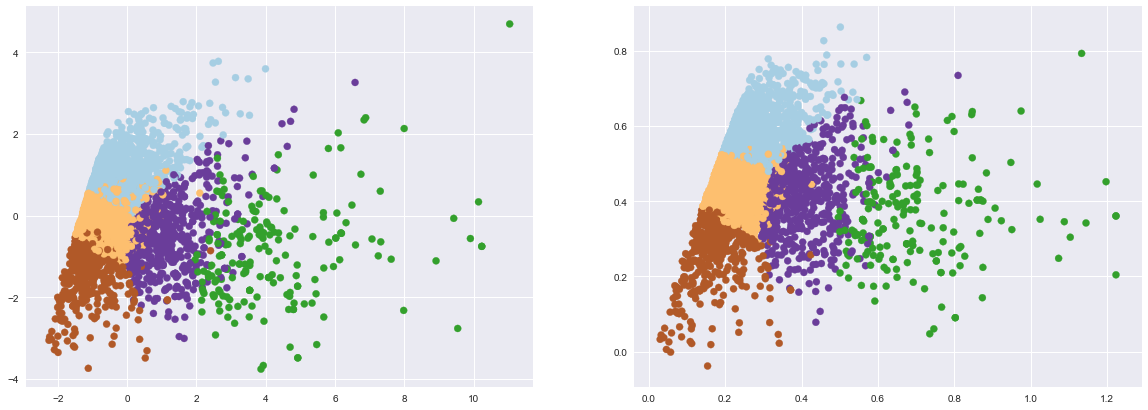

In [70]:
f, (ax1, ax2) = plt.subplots(1, 2)
X = pca.transform(mpcass)
ax1.scatter(X[:, 0], X[:, 1], c=movies["cluster"], s=50, cmap='Paired')
X = pca.transform(mpcamms)
ax2.scatter(X[:, 0], X[:, 1], c=movies["cluster"], s=50, cmap='Paired')

As we can see, there is no crucial difference in presentation of data among these various visualizations. Perhaps, this is mainly because of the character of the data (not so scattered) and because of positive correlation between features. To crown it all there is no strong evidence about which of standardization techniques are better, but in case of our data it seems that it doesn’t play a huge role.

## ----------------------------------------------------------------------------------------